In [51]:
import pandas as pd
# plot the number of unique trees vs sentence length 
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

import math
from collections import Counter
import numpy as np
import pickle
from nltk import Tree
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import figure

In [52]:
# load the data 
feature = pd.read_csv('final_data_cleaned.csv')

The R-square for this model is 0.351990270667513




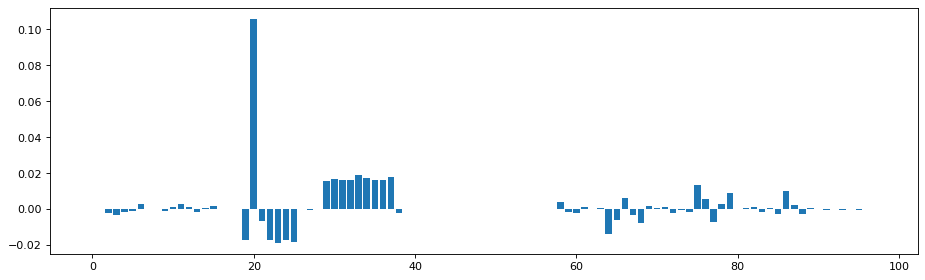

In [70]:
# with infected rate
X = feature.iloc[:,3:].drop('INFECTION RATE',axis=1).to_numpy()
y = np.array(feature['INFECTION RATE'])
features = np.array(feature.iloc[:,3:].drop('INFECTION RATE',axis=1).columns)

from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
print('The R-square for this model is {}'.format(model.score(X, y)))
print('\n')
# get importance
importance = model.coef_
# summarize feature importance
#for i,v in enumerate(importance):
#    print('Feature {}: {}, Score: {}'.format(i,feature_names[i],np.round(v,4)))
# plot feature importance
figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [73]:
data_feature_imp = pd.DataFrame(features, columns = ['feature'])
data_feature_imp['coeff'] = importance
sort_data = data_feature_imp.sort_values(by=['coeff'],ascending = False,ignore_index = True)

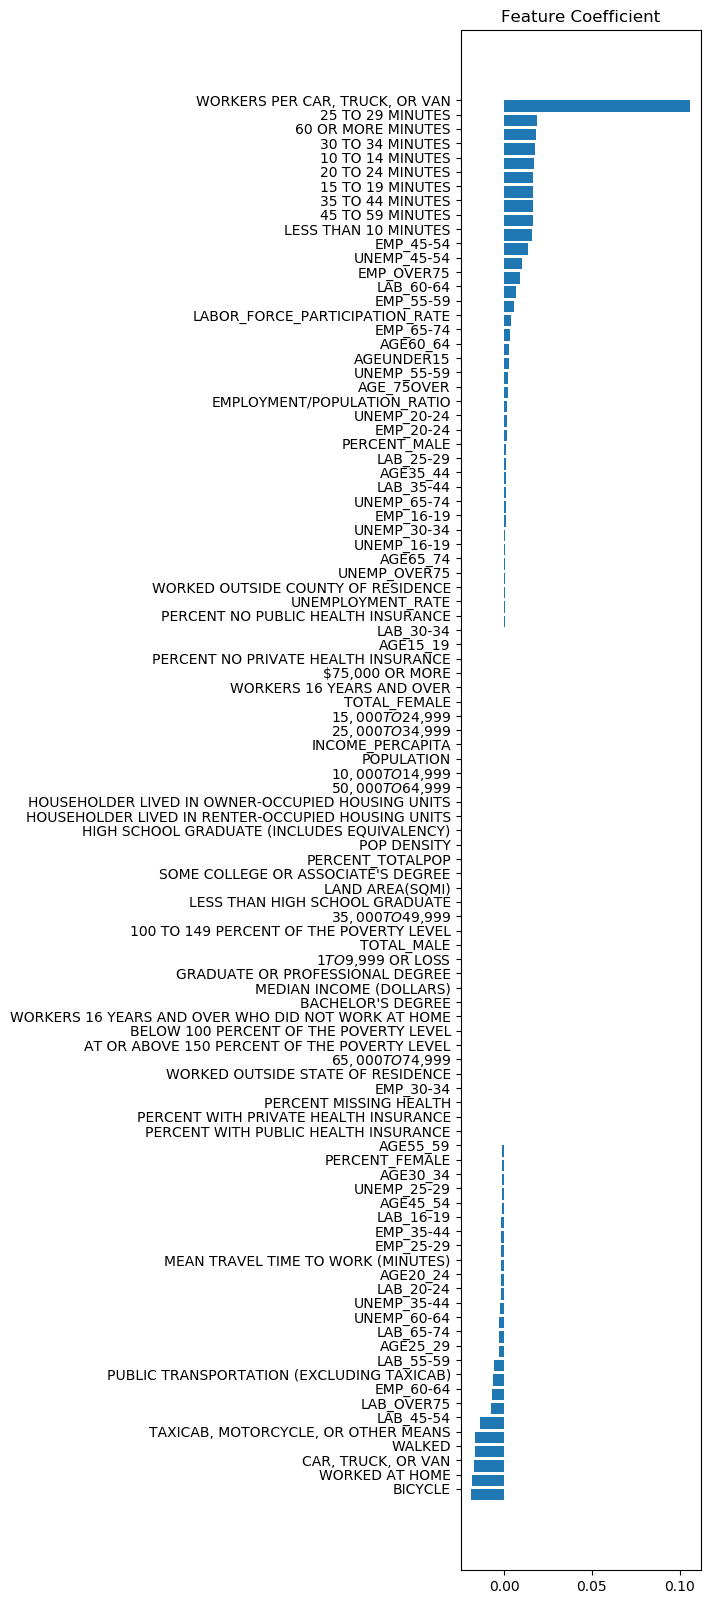

In [75]:
plt.rcdefaults()
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(8, 20))
# Example data
#people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
people = sort_data['feature']
y_pos = np.arange(len(people))
performance = sort_data['coeff']

ax.barh(y_pos, performance, align='edge')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('')
ax.set_title('Feature Coefficient')
plt.gcf().subplots_adjust(left = 0.6)
#plt.savefig('feature_importance_linear.png',doi = 80)
plt.show()

In [59]:
# do forward selection
import statsmodels.api as sm

def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [60]:
X = feature.iloc[:,3:].drop('INFECTION RATE',axis=1)
y = np.array(feature['INFECTION RATE'])
selected_features = forward_selection(X,y)
selected_features

/Users/bckou/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':


['PUBLIC TRANSPORTATION (EXCLUDING TAXICAB)',
 'GRADUATE OR PROFESSIONAL DEGREE',
 "BACHELOR'S DEGREE",
 '$75,000 OR MORE',
 'LESS THAN 10 MINUTES',
 '$65,000 TO $74,999',
 'HIGH SCHOOL GRADUATE (INCLUDES EQUIVALENCY)',
 'AT OR ABOVE 150 PERCENT OF THE POVERTY LEVEL',
 '$25,000 TO $34,999',
 'AGE65_74',
 'TOTAL_FEMALE',
 'BELOW 100 PERCENT OF THE POVERTY LEVEL',
 'LESS THAN HIGH SCHOOL GRADUATE',
 'WORKERS 16 YEARS AND OVER',
 'WORKERS 16 YEARS AND OVER WHO DID NOT WORK AT HOME',
 '$1 TO $9,999 OR LOSS',
 '$15,000 TO $24,999',
 'LAB_16-19',
 'LAB_65-74',
 'PERCENT WITH PUBLIC HEALTH INSURANCE',
 'HOUSEHOLDER LIVED IN RENTER-OCCUPIED HOUSING UNITS',
 'UNEMP_20-24']

The R-square for this model is 0.3345851618598399




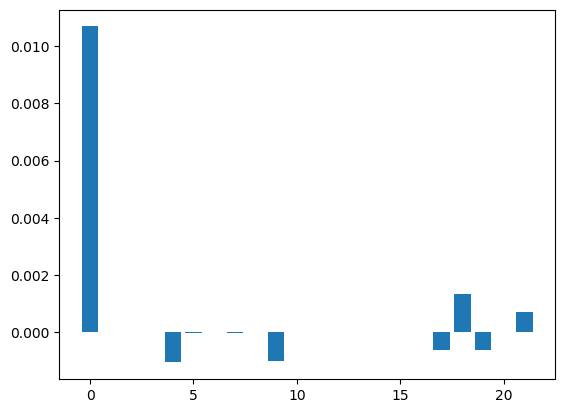

In [76]:
# use selected features 
X = feature.iloc[:,3:].drop('INFECTION RATE',axis=1)
y = np.array(feature['INFECTION RATE'])
X_new = feature[selected_features]
model = LinearRegression()
# fit the model
model.fit(X_new, y)
print('The R-square for this model is {}'.format(model.score(X_new, y)))
print('\n')
# get importance
importance = model.coef_
# summarize feature importance
#for i,v in enumerate(importance):
#    print('Feature {}: {}, Score: {}'.format(i,selected_features[i],np.round(v,8)))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [77]:
dat = pd.DataFrame(selected_features,columns = ['feature'])
dat['coeff'] = importance
sort_dat = dat.sort_values(by=['coeff'],ascending = False,ignore_index = True)

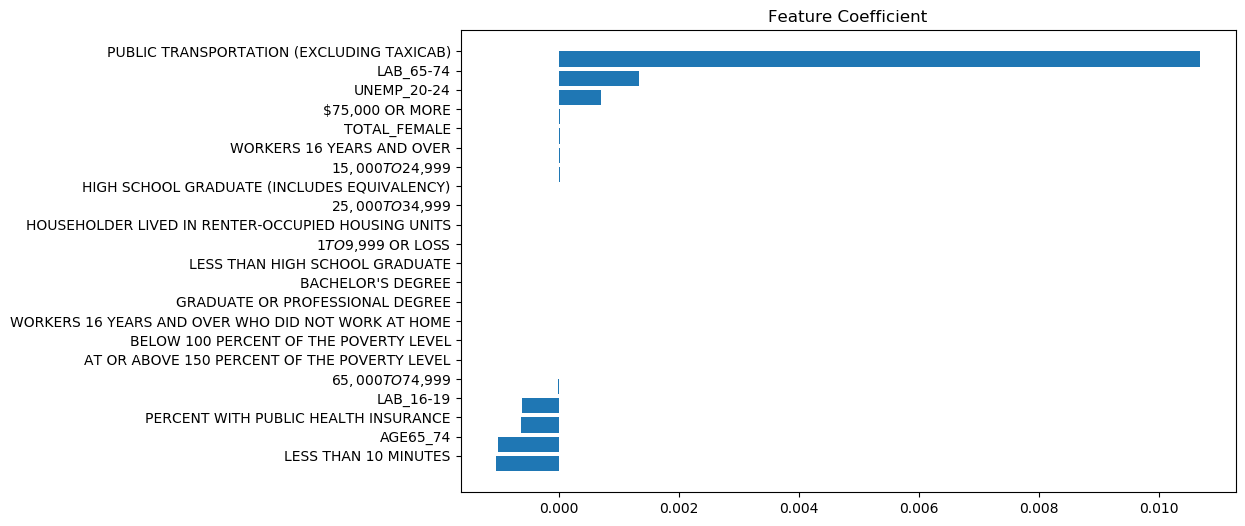

In [78]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(10, 6))
people = sort_dat['feature']
y_pos = np.arange(len(people))
performance = sort_dat['coeff']

ax.barh(y_pos, performance, align='edge')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('')
ax.set_title('Feature Coefficient')
#plt.gcf().subplots_adjust(left = 0.6)
#plt.savefig('feature_importance.png',doi = 80)
plt.show()